In [1]:
import shap
import numpy as np
import pandas as pd
from sklearn import metrics
from joblib import dump,load
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

E:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/1586_morgan_1024.csv')
df

,Unnamed: 0,PCE_max(%),Jsc(mA/cm2),FF,Voc(V),Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,...,Acceptor1014,Acceptor1015,Acceptor1016,Acceptor1017,Acceptor1018,Acceptor1019,Acceptor1020,Acceptor1021,Acceptor1022,Acceptor1023
0,0,6.93,16.35,0.500,0.865,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.09,10.31,0.380,0.794,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8.33,15.28,0.690,0.790,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8.67,14.00,0.579,1.070,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,8.46,13.95,0.601,1.010,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,1581,18.16,25.43,0.765,0.934,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1582,1582,10.70,23.51,0.598,0.761,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,1583,17.31,26.32,0.728,0.903,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,1584,17.81,26.35,0.778,0.869,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.iloc[:, 5:2053]
Y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
print("X_test's shape is", X_test.shape,"; y_test's shape is",y_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

X_train's shape is (1268, 2048) ; y_train's shape is (1268,)
X_test's shape is (318, 2048) ; y_test's shape is (318,)


In [4]:
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr

In [5]:
import pickle
with open('../model/Morgan_1024_GBDT.pkl', 'rb') as f:
    regressor = pickle.load(f)

In [6]:
model=regressor
y_train_hat = model.predict(X_train_stand)
y_test_hat = model.predict(X_test_stand)

In [7]:
#np.savetxt('y_train_Morgan_1024.csv', y_train)
#np.savetxt('y_test_Morgan_1024.csv', y_test)
#np.savetxt('y_train_hat_Morgan_1024.csv', y_train_hat)
#np.savetxt('y_test_hat_Morgan_1024.csv', y_test_hat)

In [8]:
PearsonCoefficient(y_test,y_test_hat)

0.8423116018556895

In [9]:
R2Score(y_test,y_test_hat)

0.7081619390347614

In [10]:
explainer = shap.TreeExplainer(model)
shap_explainer = explainer(X)
shap_values = explainer.shap_values(X)
shap_explainer.data=shap_explainer.data[0]
shap_explainer.values=shap_explainer.values[0]

In [11]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 36 
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 300
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

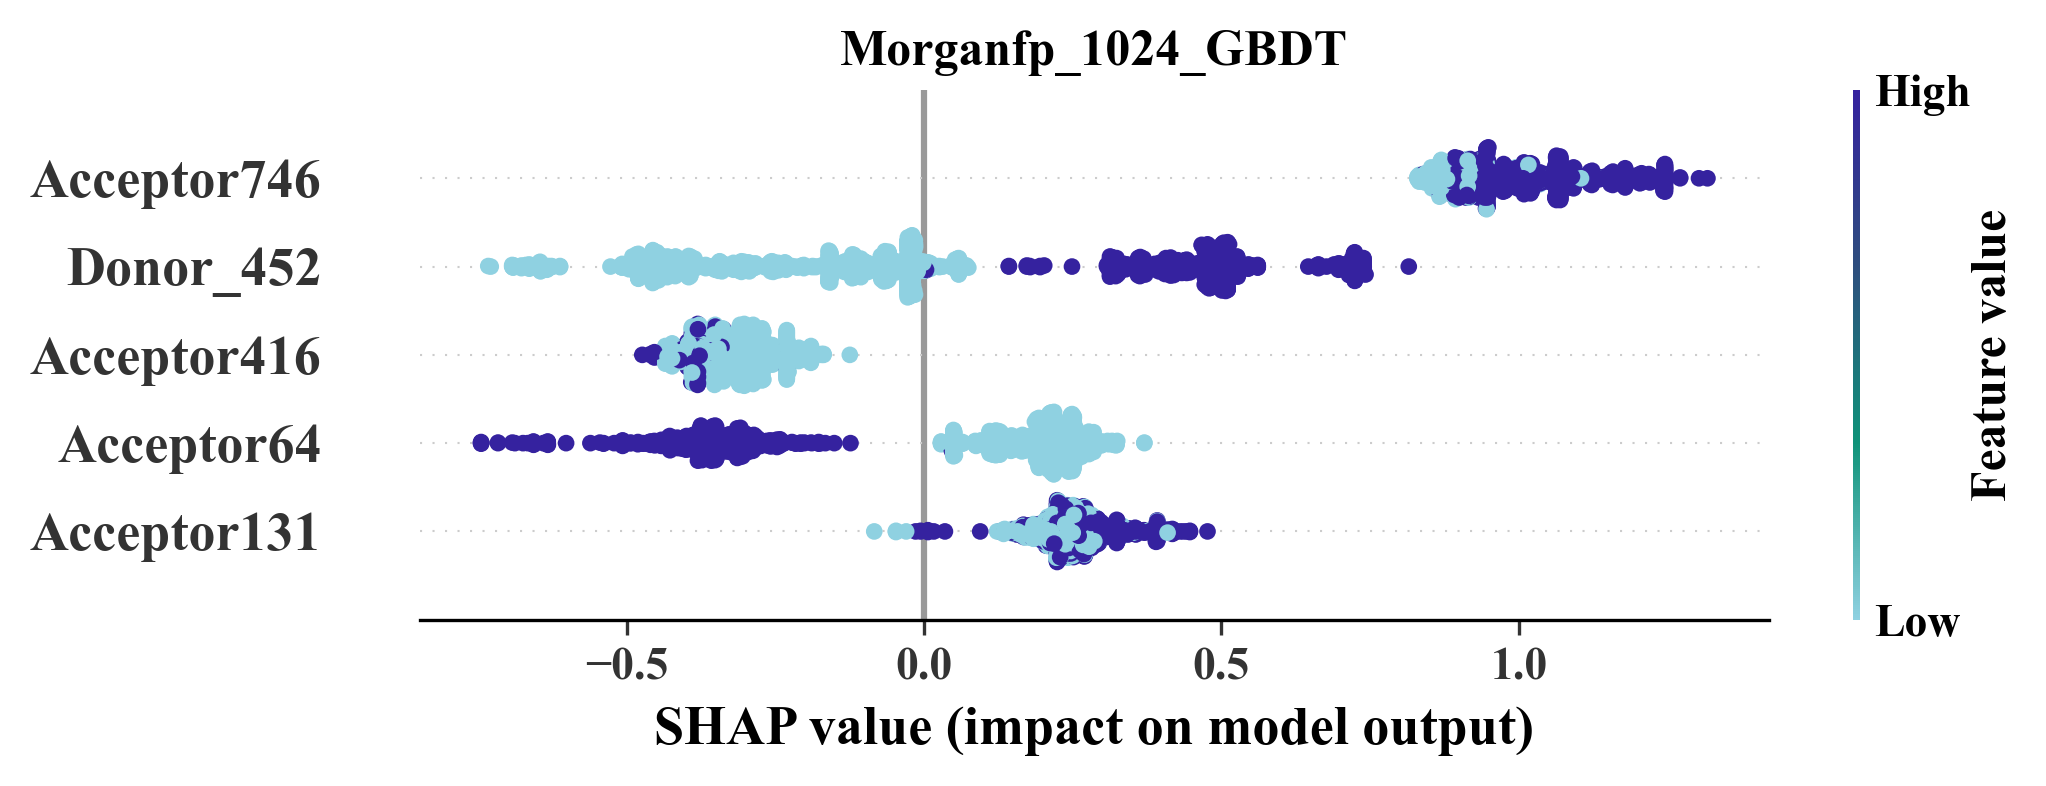

In [12]:
shap.initjs()

color01 = (143,209,225)
color02 = (15,147,121)
color03 = (46,78,126)
color04 = (53,34,159)


colors = [tuple([x / 255 for x in color]) for color in [color01, color02, color03, color04]]


gradient_colors = [colors[0], colors[1], colors[2], colors[3]]



n = 256
newcolors = []
for color in gradient_colors:
    rgba_color = cm.colors.to_rgba(color)
    newcolors.append(rgba_color)

newcmp = cm.colors.LinearSegmentedColormap.from_list('BlueYellow', newcolors, N=n)


plt.figure()

shap.summary_plot(shap_values, X, max_display=5, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)

plt.title(('Morganfp_1024_GBDT'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Morganfp_1024_GBDT_1.tif', dpi = 300)



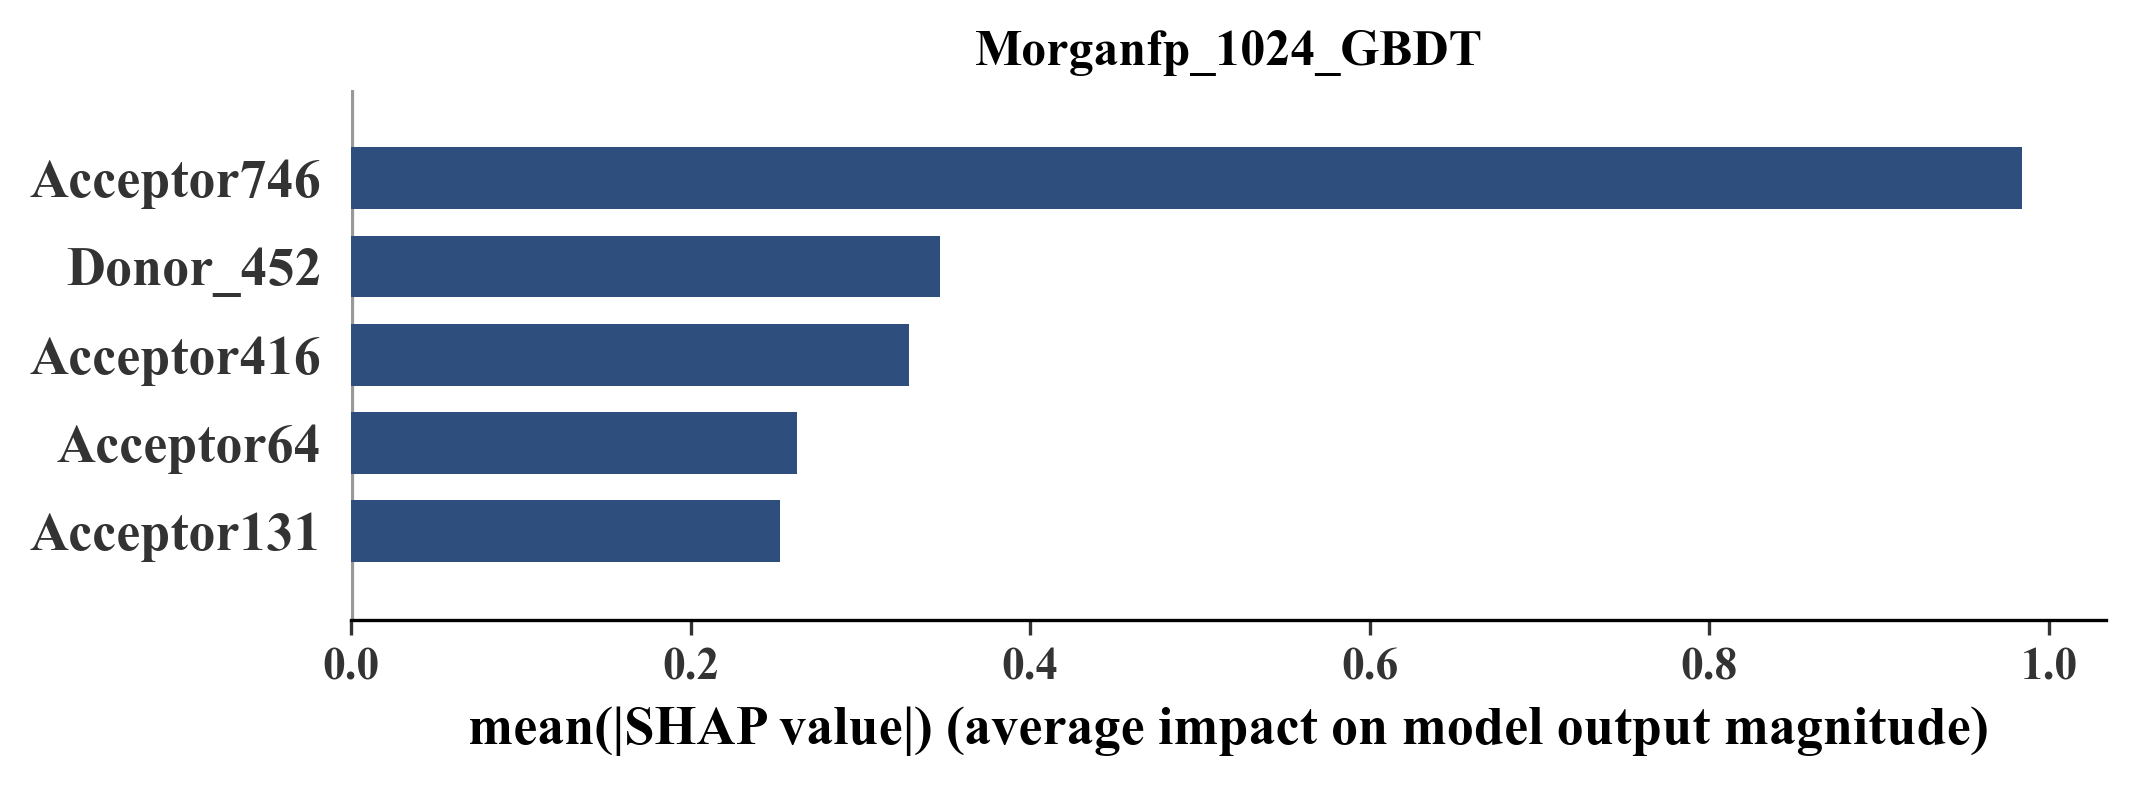

In [13]:

shap.summary_plot(shap_values,X, plot_type="bar",show=False,color="#2e4e7e",max_display=5)
plt.title(('Morganfp_1024_GBDT'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Morganfp_1024_GBDT_2.tif', dpi = 300)